<a href="https://colab.research.google.com/github/Carsonn-Chen/BINF-5220/blob/main/Liu_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4: Data inspection and standardization

## Part 1: examine California housing data set

In [ ]:
from google.colab import drive
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn.datasets

drive.mount('/content/gdrive')
figsize = (10, 6.5)
plt.rcParams.update({'font.size': 22})

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### import data

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BINF 5220/data/cadata.txt", sep = '\s+', skiprows=26, encoding_errors="replace")
print(df)

       median_house_value  median_income  housing_median_age  total_rooms  \
0                452600.0         8.3252                41.0        880.0   
1                358500.0         8.3014                21.0       7099.0   
2                352100.0         7.2574                52.0       1467.0   
3                341300.0         5.6431                52.0       1274.0   
4                342200.0         3.8462                52.0       1627.0   
...                   ...            ...                 ...          ...   
20635             78100.0         1.5603                25.0       1665.0   
20636             77100.0         2.5568                18.0        697.0   
20637             92300.0         1.7000                17.0       2254.0   
20638             84700.0         1.8672                18.0       1860.0   
20639             89400.0         2.3886                16.0       2785.0   

       total_bedrooms  population  households  latitude  longitude  
0     

### plot a histogram

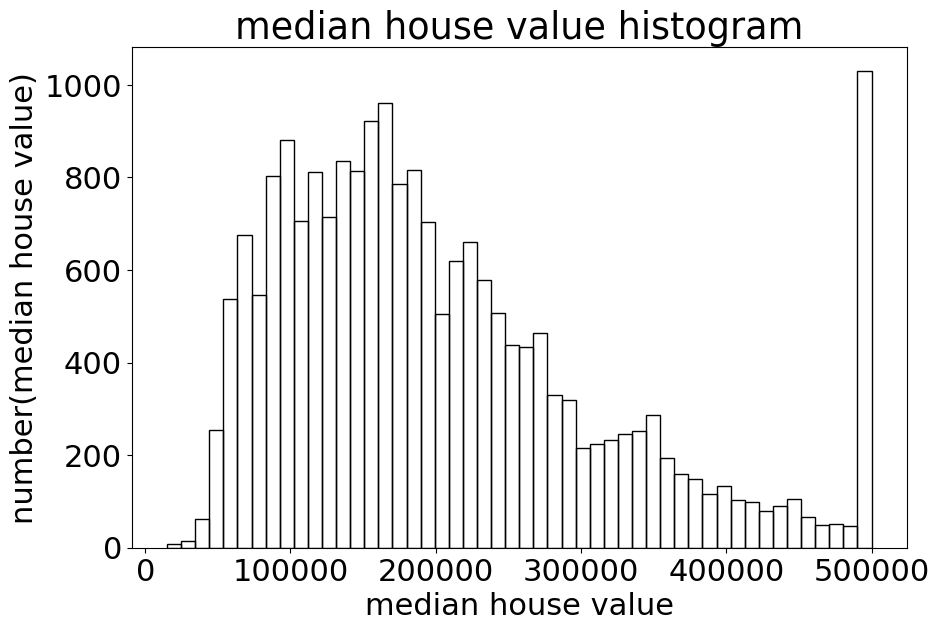

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.hist(df['median_house_value'].values, bins=50, fill=False)
ax.set_title('median house value histogram')
ax.set_xlabel('median house value')
ax.set_ylabel('number(median house value)')
fig.show()

I think the unit of this column is dollar, which means the median house value is from \$0 to \$500000. The entire middle of the distribution looks relatively smooth. There is just a sharp rise at the end. I think the reason for this may be that the uneven distribution of wealth in California has led to the state having some extremely expensive houses designed for the wealthy

### make scatterplots

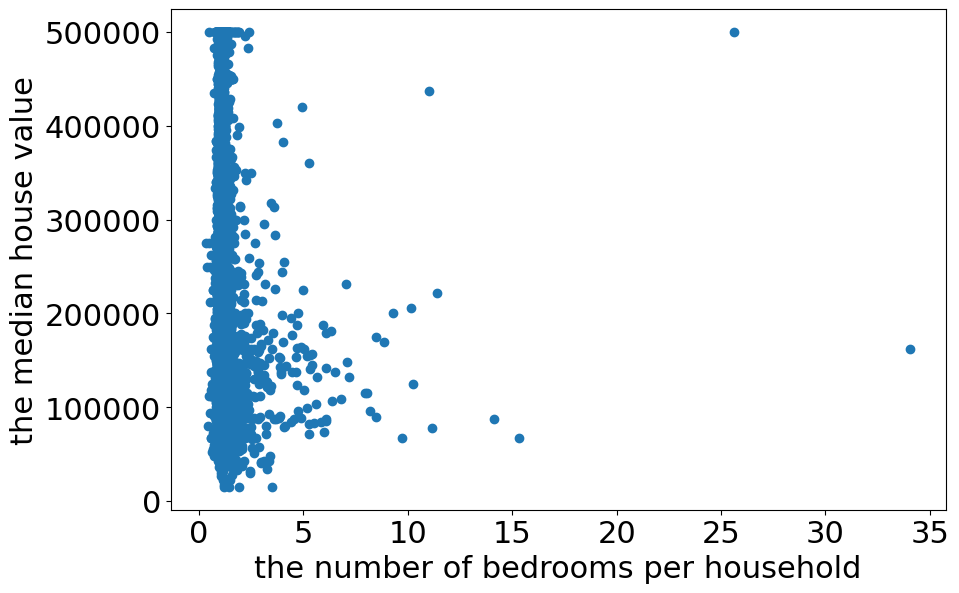

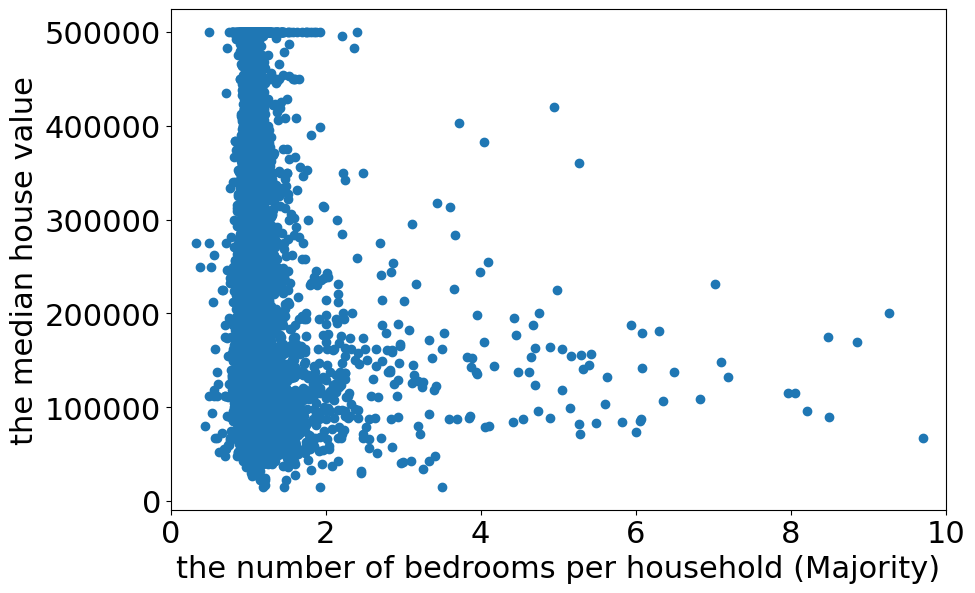

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df['total_bedrooms']/df['households'], df['median_house_value'])
ax.set_xlabel('the number of bedrooms per household')
ax.set_ylabel('the median house value')
plt.show()

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df['total_bedrooms']/df['households'], df['median_house_value'])
ax.set_xlabel('the number of bedrooms per household (Majority)')
ax.set_ylabel('the median house value')
ax.set_xlim(0,10)
plt.show()

I think home value is not determined by the number of bedrooms per home. It can be seen from the figure that when the x-axis is between 1-2, there are many points with different y-axis values. This means that there are houses of various values with between 1 and 2 bedrooms. The meaning of "total number of bedrooms" is the total number of bedrooms in the area. I think this value is reasonable. Because some families may choose to rent together, sometimes rooms such as the living room or den that are not counted as bedrooms can also accommodate a family.

### Make 3 scatterplots

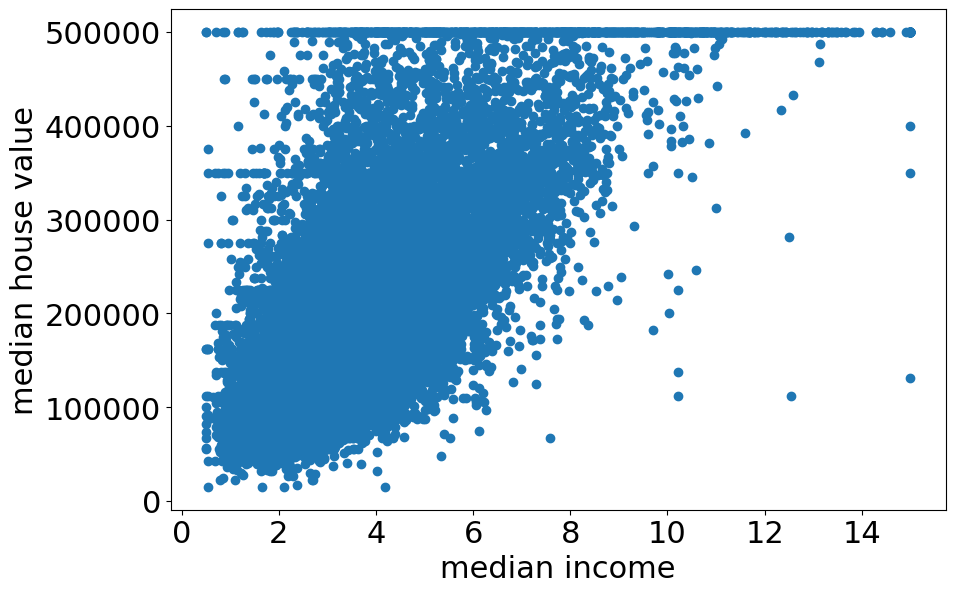

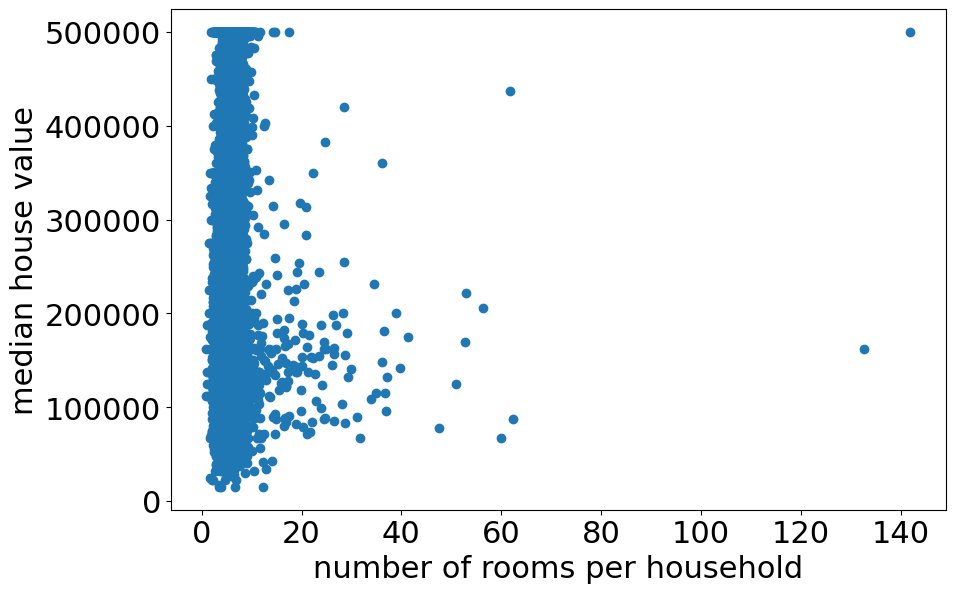

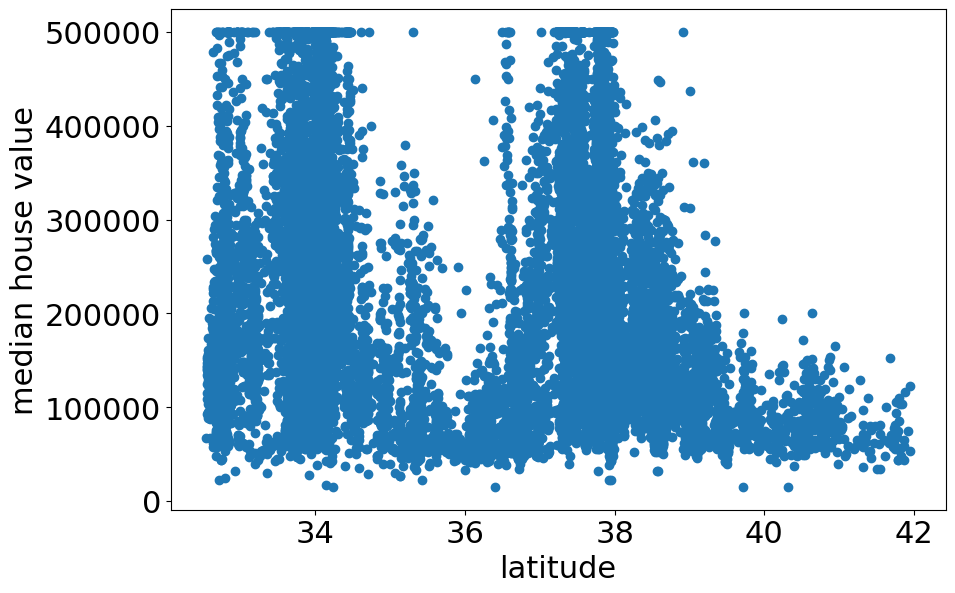

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df['median_income'], df['median_house_value'])
ax.set_xlabel('median income')
ax.set_ylabel('median house value')
plt.show()

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df['total_rooms']/df['households'], df['median_house_value'])
ax.set_xlabel('number of rooms per household')
ax.set_ylabel('median house value')
plt.show()

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df['latitude'], df['median_house_value'])
ax.set_xlabel('latitude')
ax.set_ylabel('median house value')
plt.show()

median income: There is an overall correlation between income and home value. But it can also be observed that regardless of the income value there will always be very expensive houses. On the other hand, some people with high incomes live in relatively cheap houses.

Total rooms: No significant pattern. Most houses have 1-20 rooms.

Latitude: Some latitudes have a broad range of house values, but some latitudes have only cheap houses.

## data standardization

### Import modules and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BINF 5220/data/preprocessing_sample_data_onehot.csv",index_col=0)
data.head()

,weight_kg,overall_length_mm,avg_rating,variety_0,variety_1,variety_2
0,0.003776,199.132337,285.580952,0,0,1
1,0.008966,193.617089,303.793877,0,0,1
2,0.003654,109.604169,364.958930,1,0,0
3,0.009349,249.698449,361.290959,0,0,1
4,0.005907,125.443557,231.345769,0,1,0


### Split the dataset

In [ ]:
np.random.seed(5)
data_fit, data_test = train_test_split(data, test_size = 0.25)

print(data_fit)
print("data_fit type", type(data_fit))
print("fit data shape", data_fit.shape, "test", data_test.shape)

     weight_kg  overall_length_mm  avg_rating  variety_0  variety_1  variety_2
99    0.005291         292.785720  218.215512          0          1          0
119   0.008073         210.826598  349.201986          0          0          1
221   0.009443         139.577657  311.479959          0          1          0
37    0.006124         223.371603  258.000029          0          1          0
232   0.003289         218.613489  368.200417          1          0          0
..         ...                ...         ...        ...        ...        ...
8     0.004374         202.253908  287.568766          0          0          1
73    0.003954         114.895502  167.061727          0          1          0
118   0.008159         316.712005  468.691228          1          0          0
189   0.007139         284.716416  261.420601          0          1          0
206   0.006730         196.493444  229.988899          0          1          0

[225 rows x 6 columns]
data_fit type <class 'pandas

### fit data

fitting data score 0.7288847483823705
fitting data score 0.9299773285877416


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30679e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


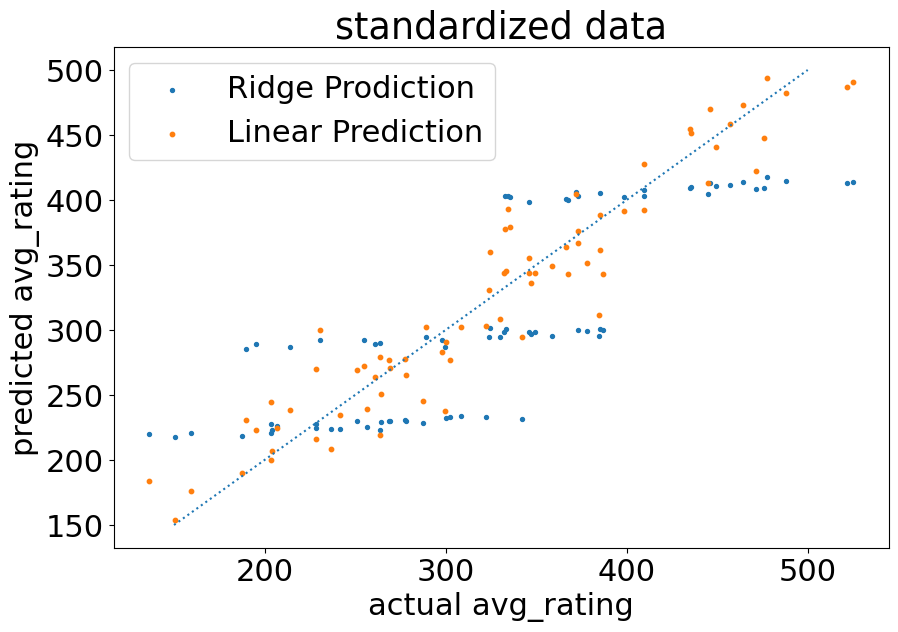

In [ ]:
model = Ridge(0.01)
model.fit(data_fit.drop('avg_rating', axis=1), data_fit['avg_rating'])
print('fitting data score', model.score(data_fit.drop('avg_rating', axis=1), data_fit['avg_rating']))


model_linear = Ridge(0)
model_linear.fit(data_fit.drop('avg_rating', axis=1), data_fit['avg_rating'])
print('fitting data score', model_linear.score(data_fit.drop('avg_rating', axis=1), data_fit['avg_rating']))

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(data_test['avg_rating'], model.predict(data_test.drop('avg_rating', axis=1)),label = "Ridge Prodiction",s =8)
ax.scatter(data_test['avg_rating'], model_linear.predict(data_test.drop('avg_rating', axis=1)),label = "Linear Prediction",s =10)
ax.plot([150,500],[150,500], ':')
ax.set_xlabel('actual avg_rating')
ax.set_ylabel('predicted avg_rating')
ax.set_title('standardized data')
ax.legend()
plt.show()

It is not standardized, so the parameter of the different features cannot be weighted the same. With ridge regression, the parameter is comparatively very small, so the for some features which are different but not has a large parameter, they may have a very close prediction. And the somes features are discontinuous (0,1) which leads to the different steps of the predicted dots. I think it is not wise to use the ridge model without standardization. But linear regression performs well.

### Pipeline

test set score 0.910075086359233
test set score 0.9100832065669449


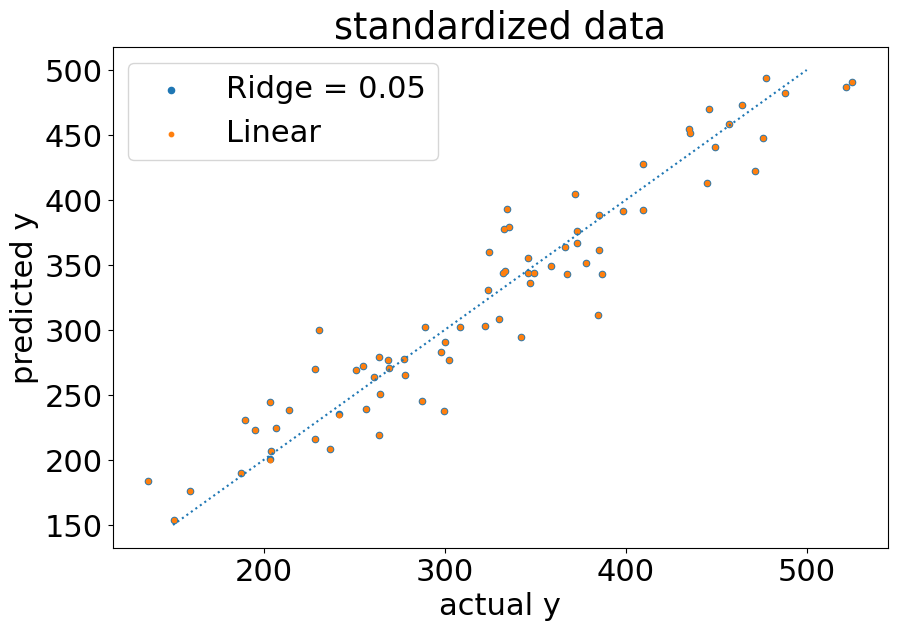

In [ ]:
def pipeline(a,b,c):
  '''
  a: random seed
  b: test split
  c: alpha
  '''
  np.random.seed(a)
  pp = make_pipeline(StandardScaler(), Ridge(alpha=c))
  fit_x, test_x, fit_y, test_y = train_test_split(data.drop('avg_rating', axis=1), data['avg_rating'],
                                                test_size=b)
  # pipeline.fit does scaler.fit and model.fit on scaler.transform(data)
  pp.fit(fit_x, fit_y)
  # pipeline.score does only model.score(scaler.transform(data))
  print('test set score', pp.score(test_x, test_y))

  return pp

np.random.seed(5)
fit_x, test_x, fit_y, test_y = train_test_split(data.drop('avg_rating', axis=1), data['avg_rating'],
                                                test_size=0.25)
a = pipeline(5,0.25,0.05)
b = pipeline(5,0.25,0)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(test_y, a.predict(test_x), label='Ridge = 0.05',s=20)
ax.scatter(test_y, b.predict(test_x), label='Linear',s=10)
ax.plot([150,500],[150,500], ':')
ax.set_xlabel('actual y')
ax.set_ylabel('predicted y')
ax.set_title('standardized data')
ax.legend()
plt.show()

The two models are exactly the same in performance. I think it is because after the standardization, the parameters are already very small and do not need the Ridge model, so they perform similarly. For linear regression, the two models are the same before and after the standardization because the standardization does not change the data distribution. The ridge model before and after the standardization are totally different, I have explained the reason above.